In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
titanic_data=pd.read_csv('/content/drive/MyDrive/train (1).csv')

In [207]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

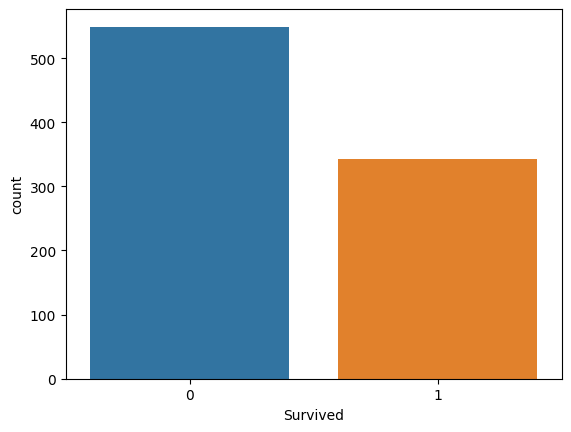

In [210]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: ylabel='Frequency'>

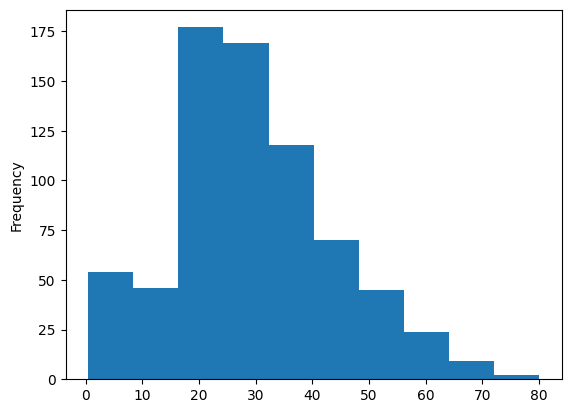

In [209]:
titanic_data['Age'].plot.hist()

<Axes: xlabel='Survived', ylabel='count'>

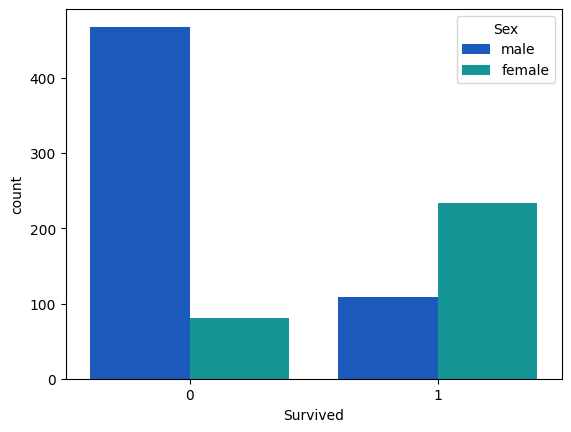

In [211]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

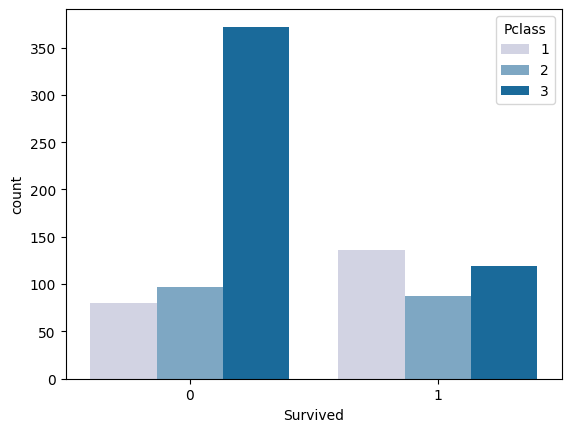

In [212]:
sns.countplot(x='Survived',hue='Pclass', data=titanic_data,palette='PuBu')

<Axes: ylabel='Frequency'>

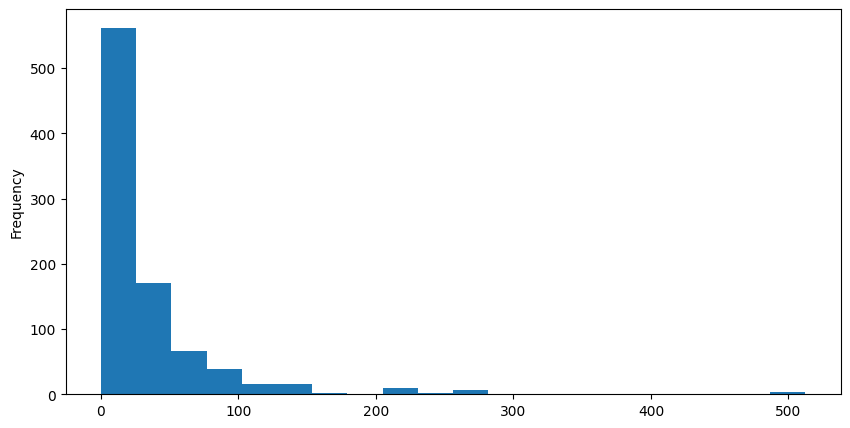

In [213]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

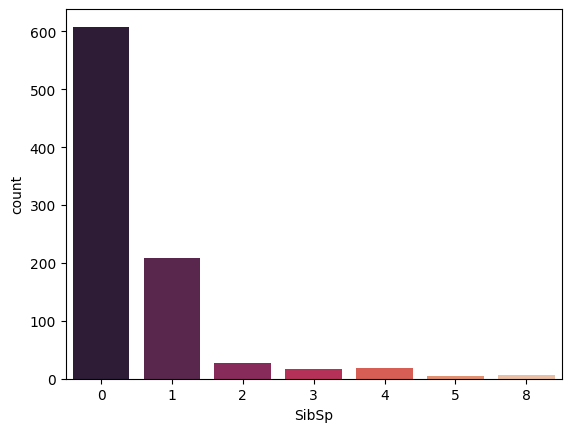

In [214]:
sns.countplot(x='SibSp',data=titanic_data,palette='rocket')

<Axes: xlabel='Parch', ylabel='count'>

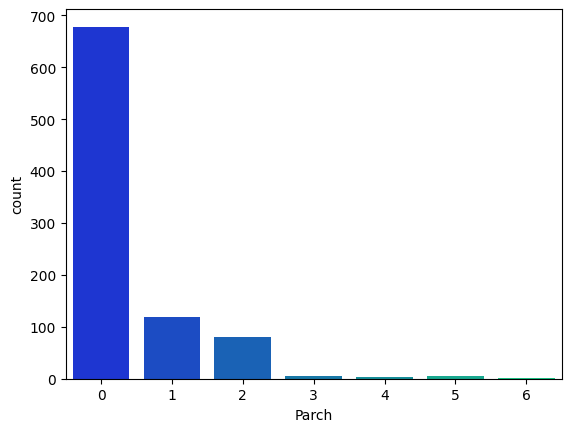

In [215]:
sns.countplot(x='Parch',data=titanic_data, palette='winter')

**Check Missing Values**

In [163]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

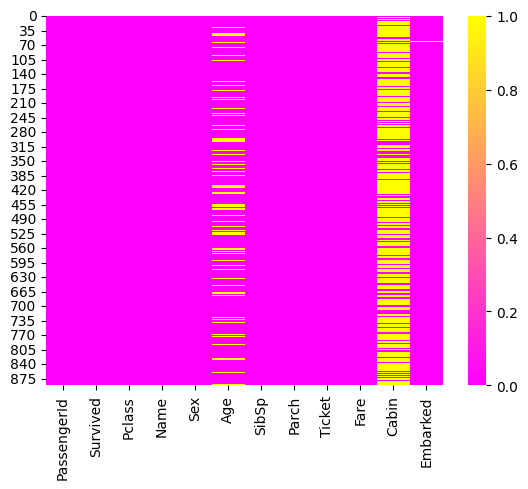

In [165]:
import seaborn as sns
sns.heatmap(titanic_data.isnull(),cmap='spring')

**Handle missing values**

In [166]:
corr_matrix=titanic_data.corr()

<ipython-input-166-04bc4f9457ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=titanic_data.corr()


In [167]:
corr_matrix['Age'].abs()

PassengerId    0.036847
Survived       0.077221
Pclass         0.369226
Age            1.000000
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

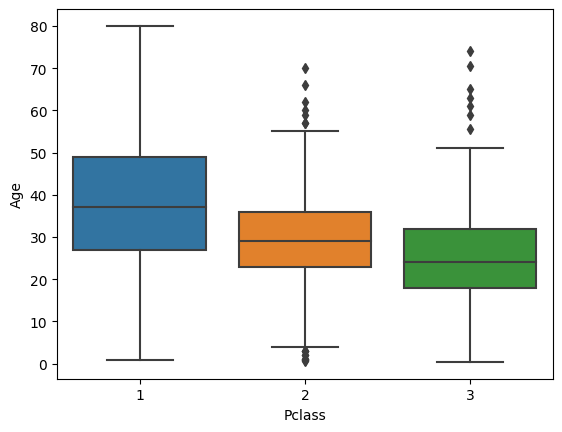

In [168]:
sns.boxplot(x='Pclass',y='Age', data=titanic_data)

In [169]:
group_Pclass=titanic_data.groupby(['Sex','Pclass'])

In [170]:
group_Pclass.mean()

<ipython-input-170-d649d826f00c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_Pclass.mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [171]:
def input_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  Sex=cols[2]

  if(pd.isnull(Age)):
    if(Pclass==1):
      if(Sex=='male'):
        return 41
      else:
        return 34
    elif(Pclass==2):
      if(Sex=='male'):
            return 30
      else:
           return 28
    else:
      if(Sex=='male'):
            return 26
      else:
           return 21
  else:
      return Age

In [172]:
titanic_data['Age']=titanic_data[['Age','Pclass','Sex']].apply(input_age,axis=1)

In [173]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [175]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [176]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [177]:
titanic_data.dropna(inplace=True)

In [178]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [180]:
titanic_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

**Correlations**

In [181]:
titanic_data.drop(['PassengerId'],axis=1,inplace=True)

In [182]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [183]:
cor_matrix=titanic_data.corr().abs()

<ipython-input-183-701169b01d3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=titanic_data.corr().abs()


In [184]:
cor_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,0.335549,0.071386,0.034040,0.083151,0.255290
Pclass,0.335549,1.000000,0.407146,0.081656,0.016824,0.548193
Age,0.071386,0.407146,1.000000,0.250984,0.177627,0.117206
SibSp,0.034040,0.081656,0.250984,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,0.177627,0.414542,1.000000,0.217532
Fare,0.255290,0.548193,0.117206,0.160887,0.217532,1.000000


The highest correlation between features is **0.548193** in data set between **Fare** and **Pclass** .
Other also highly correlated.
More data sets are correlated higher than 0.1

In [185]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [186]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [187]:
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

**Logistic Regression**

In [192]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [194]:
lm.fit(x_train,y_train)

LogisticRegression()

In [195]:
prediction=lm.predict(x_test)

In [197]:
from sklearn.metrics import classification_report

In [199]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.71      0.86      0.77       178\n           1       0.68      0.45      0.54       116\n\n    accuracy                           0.70       294\n   macro avg       0.69      0.65      0.66       294\nweighted avg       0.69      0.70      0.68       294\n'

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(y_test,prediction)

array([[153,  25],
       [ 64,  52]])

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(y_test,prediction)

0.6972789115646258

## Conclusion
I notice here that accuracy score is close to 70% which makes our model a good model to predict the values accurately , here in Titanic data set our model accurately predicts as to who will survive and who will not survive.

Through Visualization we found out that females have more chances of survival than males, class 1 have more changes of survival, youth age group 20-35 yrs male from class 3 have not survived.

Further, other Machine Learning Algorithms can be applied on the same data set, Ensemble algorithms to boost the performance of the model and get good predictions